# 0. Colab 기본 세팅

In [914]:
# 구글 드라이브 마운트(cjyjob1993@gmail.com)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [915]:
# lib 디렉토리를을 환경 변수에 추가(lib 내 파일 변경 시, 런타임을 재시작 해주어야 변경 내용이 적용됨.)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CodeStates/CodeStates_Project_1/lib')

# 1. 인공신경망 구현하기

## [0] 기본 라이브러리 임포트

In [916]:
# 사용 라이브러리 임포트
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [917]:
# dataframe 을 확인 시 편의를 위해, 출력 column 수 제한을 없앰
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### numpy.array, pandas.Dataframe 산술 테스트


#### 예시 데이터 생성

In [918]:
arr33_ex1 = np.array([[1, 2, 3], [4, 5 ,6], [7, 8, 9]])
arr33_ex2 = np.array([[10, 20, 30], [40, 50 ,60], [70, 80, 90]])
arr23_ex = np.array([[10, 20, 30], [40, 50 ,60]])
arr32_ex = np.array([[10, 20], [40, 50], [70, 80]])

df33_ex1 = pd.DataFrame([[1, 2, 3], [4, 5 ,6], [7, 8, 9]])
df33_ex2 = pd.DataFrame([[10, 20, 30], [40, 50 ,60], [70, 80, 90]])
df23_ex = pd.DataFrame([[10, 20, 30], [40, 50 ,60]])
df32_ex = pd.DataFrame([[10, 20], [40, 50], [70, 80]])

#### 데이터 타입 변환

In [919]:
# np.array to pd.DataFrame
np.array(arr33_ex1)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [920]:
# pd.DataFrame to np.array
pd.DataFrame(arr33_ex1)

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


#### 합 연산 테스트

In [921]:
# arr간 합 연산 테스트 : 동일 형태
arr33_ex1 + arr33_ex2

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [922]:
# arr간 합 연산 테스트 : 상이 형태 - 합연산 불가
# arr32_ex + arr23_ex 
# arr33_ex1 + arr32_ex
# arr33_ex1 + arr23_ex

In [923]:
# arr와 스칼라 합 연산 테스트
arr33_ex1 + 1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [924]:
# df간 합 연산 테스트 : 동일 형태
df33_ex1 + df33_ex2

,0,1,2
0,11,22,33
1,44,55,66
2,77,88,99


In [925]:
# df간 합 연산 테스트 : 상이 형태 - 합연산 불가
# df32_ex + df23_ex 
# df33_ex1 + df32_ex
# df33_ex1 + df23_ex

In [926]:
# df와 스칼라 합 연산 테스트 
df33_ex1 + 1

,0,1,2
0,2,3,4
1,5,6,7
2,8,9,10


#### 곱 연산 테스트

In [927]:
# arr간 곱 연산 테스트 : 동일 형태
arr33_ex1 * arr33_ex2

array([[ 10,  40,  90],
       [160, 250, 360],
       [490, 640, 810]])

In [928]:
# arr간 곱 연산 테스트 : 상이 형태 - 앞항의 열 == 뒷항의 행 동일시 가능 np.dot() 사용으로 구현
np.dot(arr32_ex,arr23_ex) , np.dot(arr33_ex1, arr32_ex)
# np.dot(arr33_ex1 , arr23_ex)

(array([[ 900, 1200, 1500],
        [2400, 3300, 4200],
        [3900, 5400, 6900]]), array([[ 300,  360],
        [ 660,  810],
        [1020, 1260]]))

In [929]:
# arr와 스칼라 곱 연산 테스트
arr33_ex1 * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [930]:
# df간 곱 연산 테스트 : 동일 형태
df33_ex1 * df33_ex2

,0,1,2
0,10,40,90
1,160,250,360
2,490,640,810


In [931]:
# df간 곱 연산 테스트 : 상이 형태 - 앞항의 열 == 뒷항의 행 동일시 가능 np.dot() 사용으로 구현. 단, 반환값이 np.array 자료형
np.dot(df32_ex , df23_ex) , np.dot(df33_ex1 , df32_ex)
# np.dot(df33_ex1 , df23_ex)

(array([[ 900, 1200, 1500],
        [2400, 3300, 4200],
        [3900, 5400, 6900]]), array([[ 300,  360],
        [ 660,  810],
        [1020, 1260]]))

In [932]:
# df와 스칼라 곱 연산 테스트 
df33_ex1 * 2

,0,1,2
0,2,4,6
1,8,10,12
2,14,16,18


#### 평탄화

In [933]:
arr33_ex1.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [934]:
np.array(df33_ex1).flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 데이터 필터링

In [935]:
arr33_ex1 > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [936]:
arr33_ex1[arr33_ex1>5]

array([6, 7, 8, 9])

In [937]:
df33_ex1 > 5

,0,1,2
0,False,False,False
1,False,False,True
2,True,True,True


In [938]:
df33_ex1[df33_ex1 > 5]

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,6.0
2,7.0,8.0,9.0


## [1] 데이터 불러오기 기능

1. dataLoad()
  + 설명   
    + csv파일에서 데이터를 읽어오는 함수
  + 입력
    + 없음
  + 출력
    + 데이터프레임 자료구조의 데이터 

In [939]:
def dataLoad() :
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodeStates/CodeStates_Project_1/binary_dataset.csv')
  return df

### 예시 데이터 불러오기

In [940]:
df = dataLoad()

In [941]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,136.093750,51.691005,-0.045909,-0.271816,9.342809,38.096400,4.345438,18.673649,0
1,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
2,100.890625,51.890394,0.627487,-0.026498,3.883779,23.045267,6.953168,52.279440,0
3,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
4,121.882812,53.042675,0.200521,-0.282219,2.116221,16.580876,8.947603,91.011762,0
5,125.210938,51.175197,0.139851,-0.385737,1.147993,12.414012,14.068797,228.131554,0
6,141.968750,50.470898,0.244974,-0.342665,2.823579,16.238188,8.207744,85.532584,0
7,136.500000,49.932767,0.044623,-0.374311,1.555184,12.813538,13.314339,214.813089,0
8,83.679688,36.379281,0.572532,2.664611,4.040970,23.169129,7.006681,53.514005,0
9,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1


### [3] 데이터 뒤섞기 기능


#### shuffleDf(df)
  + 설명   
    + 데이터프레임을 무작위 순서로 바꿔준 뒤, 인덱스를 초기화한다.
  + 입력
    + df
      + 사용할 데이터(전처리 이전)요소로 갖는 리스트
  + 출력
    + df
      + 입력과 동일한 형태에 순서만 무작위로 바뀐 데이터프레임

In [942]:
def shuffleDf(df) :
  idx_i = df.index
  df = df.sample(frac=1) # shuffling : 전체를 대상으로 무작위 순으로 샘플을 뽑아 데이터프레임 형태로 반환
  idx_f = df.index
  df = df.reset_index(drop=True) # index reset
  return df

In [943]:
df = shuffleDf(df)
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,107.929688,50.581954,0.320399,0.277613,2.022575,19.806556,10.472251,113.011537,0
1,136.093750,51.691005,-0.045909,-0.271816,9.342809,38.096400,4.345438,18.673649,0
2,141.968750,50.470898,0.244974,-0.342665,2.823579,16.238188,8.207744,85.532584,0
3,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
4,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
5,114.281250,41.253965,0.411821,0.616996,2.412207,20.427942,9.198392,88.370580,0
6,121.882812,53.042675,0.200521,-0.282219,2.116221,16.580876,8.947603,91.011762,0
7,123.468750,45.475085,0.345781,0.647415,32.919732,65.094197,1.605538,0.871364,1
8,103.523438,45.725739,0.336533,0.520558,11.289298,39.116453,3.509139,11.503980,0
9,125.210938,51.175197,0.139851,-0.385737,1.147993,12.414012,14.068797,228.131554,0


### [4] 데이터 전처리

#### divideLabelFeature(df, label, features) 
  + 설명   
    + 입력 데이터의 데이터 라벨, 특징 분리
  + 입력
    + df
      + 신경망에 입력할 데이터(columns = features + label)
      + 라벨이 마지막 칼럼이어야 함
    + label
      + df의 column에 접근하기 위한, label column 명
    + features
      + df의 columns에 접근하기 위한, label column 명을 요소로 갖는 리스트
  + 출력
    + X 
      + 신경망에 입력할 특징 데이터(DataFrame 자료형)
    + y
      + 신경망의 출력값과 비교할 label 데이터(Series 자료형)

In [944]:
def divideLabelFeature(df, label, features) :
  df = df.copy()
  X = df[features]
  y = df[label]
  return X, y

In [945]:
features = df.columns[:-1]
label = df.columns[-1]
X, y = divideLabelFeature(df, label, features)
X, y

(            x1         x2        x3         x4          x5         x6         x7          x8
 0   107.929688  50.581954  0.320399   0.277613    2.022575  19.806556  10.472251  113.011537
 1   136.093750  51.691005 -0.045909  -0.271816    9.342809  38.096400   4.345438   18.673649
 2   141.968750  50.470898  0.244974  -0.342665    2.823579  16.238188   8.207744   85.532584
 3    99.367188  41.572202  1.547197   4.154106   27.555184  61.719016   2.208808    3.662680
 4    27.765625  28.666042  5.770087  37.419009   73.112876  62.070220   1.268206    1.082920
 5   114.281250  41.253965  0.411821   0.616996    2.412207  20.427942   9.198392   88.370580
 6   121.882812  53.042675  0.200521  -0.282219    2.116221  16.580876   8.947603   91.011762
 7   123.468750  45.475085  0.345781   0.647415   32.919732  65.094197   1.605538    0.871364
 8   103.523438  45.725739  0.336533   0.520558   11.289298  39.116453   3.509139   11.503980
 9   125.210938  51.175197  0.139851  -0.385737    1.147993 

#### normalize(df)
  + 설명   
    + 신경망에 입력할 데이터들을 각 특징별로 최댓값으로 나눠 0~1 사이 값으로 정규화 한다.
  + 입력
    + df
      + 신경망에 입력할 데이터(features)
  + 출력
    + result
      + 신경망에 입력할 정규화된 특징 데이터(DataFrame 자료형)

In [946]:
def normalize(df) :
  result = df.copy()
  for col in df.columns :
    max = df[col].max()
    result[col] = df[col] / max
  return result

In [947]:
X = normalize(X)
X

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.760236,0.948137,0.055528,0.007419,0.013800,0.240387,0.611758,0.332719
1,0.958618,0.968926,-0.007956,-0.007264,0.063744,0.462365,0.253848,0.054977
2,1.000000,0.946055,0.042456,-0.009158,0.019265,0.197078,0.479472,0.251818
3,0.699923,0.779253,0.268141,0.111016,0.188002,0.749066,0.129032,0.010783
4,0.195576,0.537333,1.000000,1.000000,0.498831,0.753329,0.074085,0.003188
5,0.804975,0.773288,0.071372,0.016489,0.016458,0.247928,0.537343,0.260173
6,0.858519,0.994262,0.034752,-0.007542,0.014438,0.201237,0.522692,0.267949
7,0.869690,0.852411,0.059926,0.017302,0.224603,0.790030,0.093791,0.002565
8,0.729199,0.857109,0.058324,0.013912,0.077024,0.474745,0.204993,0.033869
9,0.881961,0.959257,0.024237,-0.010309,0.007832,0.150665,0.821857,0.671645


#### splitData(df, train_portion)
  + 설명   
    + 신경망에 입력할 데이터들을 train set과 test set으로 분리한다.
  + 입력
    + df
      + 신경망에 입력할 데이터(features)
    + train_portion(0~1사이의 실수)
      + 데이터 분할 시 train set의 비율
  + 출력
    + train
      + 신경망 학습에 사용할 데이터(DataFrame 자료형)
    + test
      + 신경망 평가에 사용될 데이터(DataFrame 자료형)


In [948]:
def splitData(df, train_portion) :
  div = int(len(df) * train_portion)
  train = df.iloc[:div]
  test = df.iloc[div:]
  return train, test

In [949]:
X_train, X_test = splitData(X, 0.8)
y_train, y_test = splitData(y, 0.8)
X_train, X_test, y_train, y_test

(          x1        x2        x3        x4        x5        x6        x7        x8
 0   0.760236  0.948137  0.055528  0.007419  0.013800  0.240387  0.611758  0.332719
 1   0.958618  0.968926 -0.007956 -0.007264  0.063744  0.462365  0.253848  0.054977
 2   1.000000  0.946055  0.042456 -0.009158  0.019265  0.197078  0.479472  0.251818
 3   0.699923  0.779253  0.268141  0.111016  0.188002  0.749066  0.129032  0.010783
 4   0.195576  0.537333  1.000000  1.000000  0.498831  0.753329  0.074085  0.003188
 5   0.804975  0.773288  0.071372  0.016489  0.016458  0.247928  0.537343  0.260173
 6   0.858519  0.994262  0.034752 -0.007542  0.014438  0.201237  0.522692  0.267949
 7   0.869690  0.852411  0.059926  0.017302  0.224603  0.790030  0.093791  0.002565
 8   0.729199  0.857109  0.058324  0.013912  0.077024  0.474745  0.204993  0.033869
 9   0.881961  0.959257  0.024237 -0.010309  0.007832  0.150665  0.821857  0.671645
 10  0.870130  1.000000  0.012492 -0.001913  0.005334  0.128295  1.000000  1

### [5] 미니배치


#### minibatch(df, batchSize)
+ 설명
  + 신경망에 입력할 데이터를 batchSize에 맞춰 나눈 후, 리스트로 모아서 반환한다.
+ 입력
  + df
    + 신경망에 입력할 데이터
  + batchSize
    + 신경망에 1 iteration마다 입력될 데이터 크기
    + 마지막 batch에 존재하는 데이터의 개수가 batchSize보다 작다면 해당 batch는 버려진다.
+ 출력
  + batchs
    + batchSize 크기로 신경망에 입력할 데이터를 DataFrame 자료형으로 나눈 값들을 요소로 하는 리스트

In [950]:
def miniBatch(df, batchSize) :
  batchs = []
  count = len(df) // batchSize
  for i in range(count) :
    div = i*batchSize
    batchs.append(df[div:div+batchSize])
  return batchs  

In [951]:
X_train_batchs, y_train_batchs = miniBatch(X_train, 5), miniBatch(y_train, 5)
X_train_batchs, y_train_batchs

([         x1        x2        x3        x4        x5        x6        x7        x8
  0  0.760236  0.948137  0.055528  0.007419  0.013800  0.240387  0.611758  0.332719
  1  0.958618  0.968926 -0.007956 -0.007264  0.063744  0.462365  0.253848  0.054977
  2  1.000000  0.946055  0.042456 -0.009158  0.019265  0.197078  0.479472  0.251818
  3  0.699923  0.779253  0.268141  0.111016  0.188002  0.749066  0.129032  0.010783
  4  0.195576  0.537333  1.000000  1.000000  0.498831  0.753329  0.074085  0.003188,
           x1        x2        x3        x4        x5        x6        x7        x8
  5  0.804975  0.773288  0.071372  0.016489  0.016458  0.247928  0.537343  0.260173
  6  0.858519  0.994262  0.034752 -0.007542  0.014438  0.201237  0.522692  0.267949
  7  0.869690  0.852411  0.059926  0.017302  0.224603  0.790030  0.093791  0.002565
  8  0.729199  0.857109  0.058324  0.013912  0.077024  0.474745  0.204993  0.033869
  9  0.881961  0.959257  0.024237 -0.010309  0.007832  0.150665  0.821857  

In [952]:
def stochasticBatch(X_train, y_train, batchSize) :
  batchMask = np.random.choice(X_train.shape[0], batchSize)
  X_train_batch = X_train.iloc[batchMask]
  y_train_batch = y_train.iloc[batchMask]
  return X_train_batch, y_train_batch

In [953]:
X_train_batch, y_train_batch = stochasticBatch(X_train, y_train, 5)
X_train_batch, y_train_batch

(          x1        x2        x3        x4        x5        x6        x7        x8
 12  0.666245  0.670677  0.205770  0.098545  0.041421  0.361193  0.310706  0.084490
 9   0.881961  0.959257  0.024237 -0.010309  0.007832  0.150665  0.821857  0.671645
 13  0.966707  0.870774  0.007843 -0.011728  0.405925  0.943695  0.042046 -0.003483
 11  0.849164  0.853813  0.049033  0.011222  0.009270  0.158737  0.777656  0.625910
 14  0.956967  0.973542  0.011398 -0.009784  0.141737  0.640487  0.159532  0.019453,
 12    1
 9     0
 13    0
 11    1
 14    0
 Name: y, dtype: int64)

## 활성 함수

### identity
  + 설명   
    + 입력값을 그대로 출력하는 활성 함수
  + 입력
    + x = 가중합 배열
  + 출력
    + y = 가중합 배열

In [ ]:
class identity():

  def __init__(self, x) :
    self.x = x
    
  def func(self) :
    return self.x

In [954]:
class identity():

  def __init__(self) :
    self.x = None
    
  def forward(self, x) :
    self.x = x
    return self.x

  def backward(self) :
    return 1

In [955]:
identity(10).func()

10

### sigmoid
  + 설명   
    + 입력값을 시그모이드 함수를 적용해 출력하는 활성 함수
  + 입력
    + x = 가중합 배열
  + 출력
    + y = 시그모이드 함수를 통과한 가중합 배열

In [956]:
class sigmoid():
  
  def __init__(self, x) :
    self.x = x

  def func(self) :
    return 1/(1 + np.exp(-self.x))  

In [ ]:
class sigmoid() :
  def __init__(self) :
    self.out = None

  def forward(self, x) :
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out

  def backward(self,dout) :
    dx = dout * (1.0 - self.out) * self.out
    return dx

#### 시그모이드 테스트

In [957]:
s = sigmoid(0.5)
s.x, s.func()

(0.5, 0.6224593312018546)

In [958]:
# 시그모이드 np 1dim array 입력 실험
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x).x, sigmoid(x).func()

(array([-1.,  1.,  2.]), array([0.26894142, 0.73105858, 0.88079708]))

In [959]:
# 시그모이드 np 2dim array 입력 실험
x = np.array([[-1.0, 1.0, 2.0], [1.0, 2.0, -1.0]])
sigmoid(x).x, sigmoid(x).func()

(array([[-1.,  1.,  2.],
        [ 1.,  2., -1.]]), array([[0.26894142, 0.73105858, 0.88079708],
        [0.73105858, 0.88079708, 0.26894142]]))

In [960]:
# 시그모이드 pd 1dim dataframe 입력 실험
x = pd.DataFrame([-1.0, 1.0, 2.0])
sigmoid(x).x, sigmoid(x).func()

(     0
 0 -1.0
 1  1.0
 2  2.0,           0
 0  0.268941
 1  0.731059
 2  0.880797)

In [961]:
# 시그모이드 pd 2dim dataframe 입력 실험
x = pd.DataFrame([[-1.0, 1.0, 2.0], [1.0, 2.0, -1.0]])
sigmoid(x).x, sigmoid(x).func()

(     0    1    2
 0 -1.0  1.0  2.0
 1  1.0  2.0 -1.0,           0         1         2
 0  0.268941  0.731059  0.880797
 1  0.731059  0.880797  0.268941)

### ReLU
  + 설명   
    + 입력값을 ReLU 함수를 적용해 출력하는 활성 함수
  + 입력
    + x = 가중합 배열
  + 출력
    + y = relu 함수를 통과한 가중합 배열

In [ ]:
class relu() :

  def __init__(self, x):
    self.x = x
    
  def func(self) :
    return np.maximum(0, self.x)

In [962]:
class relu() :

  def __init__(self):
    self.mask = None
    
  def forward(self, x) :
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0
    return out

  def backword(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

In [963]:
# relu np 2dim array 입력 실험
x = np.array([[-1.0, 1.0, 2.0], [1.0, 2.0, -1.0]])
relu(x).x, relu(x).func()

(array([[-1.,  1.,  2.],
        [ 1.,  2., -1.]]), array([[0., 1., 2.],
        [1., 2., 0.]]))

### Softmax
  + 설명   
    + 입력값을 Softmax 함수를 적용해 총합이 1이 되도록 각 출력층의 값을 결정하는 활성 함수
  + 입력
    + x = 가중합 배열
  + 출력
    + y = 시그모이드 함수를 통과한 가중합 배열

In [964]:
class softmax() :
  
  def __init__(self, x):
    self.x = x

  def func(self) :
    max = np.max(self.x)
    exp_x = np.exp(self.x - max)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [ ]:
class softmax() :
  
  def __init__(self):
    self.x = None
    self.loss = None
    self.y = None
    self.t = None # One hot encode 

  def func(self) :
    max = np.max(self.x)
    exp_x = np.exp(self.x - max)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

  def forward(self, x, t) :
    self.x = x
    self.t = t
    self.y = self.func()
    self.loss = crossEntropyError_oneHot(self.y, self.t)
    return self.loss

  def backward(self, dout = 1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx

#### Softmax 테스트 코드

In [965]:
# softmax pd 1dim dataframe 입력 실험
x = pd.DataFrame([-1.0, 1.0, 2.0])
softmax(x).x, softmax(x).func(), np.sum(softmax(x).func())

(     0
 0 -1.0
 1  1.0
 2  2.0,           0
 0  0.035119
 1  0.259496
 2  0.705385, 0    1.0
 dtype: float64)

## [6] 손실(교차 엔트로피)값 연산 기능


In [966]:
def meanSquaredError(y, t) :
  return 0.5 * np.sum((y-t) ** 2)

In [967]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
a = meanSquaredError(y, t) # 0.09750000000000003
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
b = meanSquaredError(y, t) # 0.5975 
print(a, b, a+b, (a+b)/2)

0.09750000000000003 0.5975 0.6950000000000001 0.34750000000000003


In [968]:
def crossEntropyError_oneHot(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0] # 위의 if 문을 통해, 1차원 배열인 경우 batch_size = 1 이 가능하다
  delta = 1e-7 # 아주 작은 값 더하기 (y가 0인 경우 -inf 값을 예방)
  return -np.sum(t * np.log(y + delta)) / batch_size # oneHotEncoding 되어 있는 경우, t=1인 노드의 신호만 남기에 np.log(y+delta) 를 사용한다.

아래 실험으로 다차원 배열에서도 정상 작동함을 확인

In [969]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
a = crossEntropyError_oneHot(y, t)
a

0.510825457099338

In [970]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
b = crossEntropyError_oneHot(y, t)
b

2.302584092994546

In [971]:
(a + b) / 2

1.406704775046942

In [972]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.2, 0.0, 0.05, 0.1, 0.0, 0.5, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
c = crossEntropyError_oneHot(y, t)
c

1.6094374124342252

In [973]:
(a + b + c) / 3

1.474282320842703

In [974]:
t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]) # 클래스는 인덱스가 2인 경우
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]]) # 클래스를 인덱스가 2인 경우로 예측
crossEntropyError_oneHot(y, t)

1.406704775046942

In [975]:
t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]) # 클래스는 인덱스가 2인 경우
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0], [0.1, 0.05, 0.2, 0.0, 0.05, 0.1, 0.0, 0.5, 0.0, 0.0]]) # 클래스를 인덱스가 2인 경우로 예측
crossEntropyError_oneHot(y, t)

1.474282320842703

In [976]:
y[[1,2], [0, 1]]

array([0.1 , 0.05])

In [977]:
def crossEntropyError_label(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0] # 위의 if 문을 통해, 1차원 배열인 경우 batch_size = 1 이 가능하다
  delta = 1e-7 # 아주 작은 값 더하기 (y가 0인 경우 -inf 값을 예방)
  return -np.sum(np.log((y + delta)[np.arange(batch_size), t])) / batch_size # t가 label로 되어 있는 경우, 해당 라벨의 예측값(y[t])을 불러와 사용한다.

In [978]:
# np.array 추가 활용법
y =  np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(y[0][0], y[0][1], y[0][2], y[1][0], y[1][1], y[1][2], y[2][0], y[2][1], y[2][2])
print(y[0,0], y[0,1], y[0,2], y[1,0], y[1,1], y[1,2], y[2,0], y[2,1], y[2,2])
print(y[[1,2]])
print(y[[1,2],0]) # 뒤의 0이 [0, 0]으로 브로드캐스트되어 1, 2 번 행의 0번 요소를 가져옴
print(y[[1,2],[1,2]]) 
print(np.array([y[1][1], y[2][2]]))
  # y[1, 1] = y[1][1]
  # y[[1, 2, 3], [1, 2, 3]] = [y[1,1], y[2,2], y[3,3]]

1 2 3 4 5 6 7 8 9
1 2 3 4 5 6 7 8 9
[[4 5 6]
 [7 8 9]]
[4 7]
[5 9]
[5 9]


In [979]:
t = np.array([2]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
a = crossEntropyError_label(y, t)
a

0.510825457099338

In [980]:
t = np.array([2]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
b = crossEntropyError_label(y, t)
b

2.302584092994546

In [981]:
(a + b) / 2

1.406704775046942

In [982]:
t = np.array([2]) # 클래스는 인덱스가 2인 경우
y = np.array([0.1, 0.05, 0.2, 0.0, 0.05, 0.1, 0.0, 0.5, 0.0, 0.0]) # 클래스를 인덱스가 2인 경우로 예측
c = crossEntropyError_label(y, t)
c

1.6094374124342252

In [983]:
(a + b + c) / 3

1.474282320842703

In [984]:
t = np.array([2, 2]) # 클래스는 인덱스가 2인 경우
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]]) # 클래스를 인덱스가 2인 경우로 예측
crossEntropyError_label(y, t)

1.406704775046942

In [985]:
t = np.array([2, 2, 2]) # 클래스는 인덱스가 2인 경우
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0], [0.1, 0.05, 0.2, 0.0, 0.05, 0.1, 0.0, 0.5, 0.0, 0.0]]) # 클래스를 인덱스가 2인 경우로 예측
crossEntropyError_label(y, t)

1.474282320842703

## 수치 미분

In [986]:
def numerical_diff(f, x): # 하나의 변수에 대해서만 미분 가능(편미분 한 값들을 한번에 고려할 수 없음)
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h) # 수치 미분(차분 미분 : 아주 작은 수를 이용해 미분의 근사값 계산)

In [987]:
def function_1(x):
    return x**2 + x

In [988]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

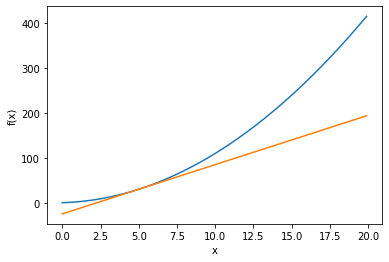

In [989]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 편미분을 통한 기울기 구하기

In [990]:
def function_2(x):
  return x[0]**2 + x[1]**2 

In [991]:
def numerical_gradient(f, x) : # 기존 구현 - x가 다차원 배열인 경우 x.size를 이용한 인덱스 접근에서 오류가 있어 정상 작동하지 않음.
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # 기울기를 저장할 0 배열 할당

  for idx in range(x.size) :
    tmp_val = x[idx]

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)  

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x) 

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
  
  return grad

In [992]:
numerical_gradient(function_2, np.array([3.0, 4.0])) , numerical_gradient(function_2, np.array([0.0, 2.0])), numerical_gradient(function_2, np.array([3.0, 0.0])) # array([6., 8.]), array([0., 4.]), array([6., 0.])

(array([6., 8.]), array([0., 4.]), array([6., 0.]))

In [993]:
def function_3(x) :
  return x[0][0] ** 2 + x[0][1] ** 2 + x[1][0] ** 2 + x[1][1] ** 2 + x[0][2] ** 2 + x[1][2] ** 2

In [994]:
x = np.array([[1.0, 2.0, 3.0], [6.0, 4.0, 5.0]])

In [995]:
function_3(x)

91.0

In [996]:
def partial_diff(f, x) : # 간단한 예시에서는 구동하는데, 신경망 가중치 계산이 비정상 작동 중
  h = 1e-4 # 0.0001

  shape = x.shape
  print(shape)

  if x.ndim == 1 :
    x = x.reshape(1, x.size) 
    print(x.shape)

  grad = np.zeros_like(x) # 기울기를 저장할 0 배열 할당

  for i in range(x.shape[0]) :
    for j in range(x[i].shape[0]) :
      tmp_val = x[i][j]
      print(tmp_val)

      # f(x+h) 계산
      x[i][j] = tmp_val + h
      fxh1 = f(x.reshape(shape))  
      print(fxh1)

      # f(x-h) 계산
      x[i][j] = tmp_val - h
      fxh2 = f(x.reshape(shape))
      print(fxh2) 

      grad[i][j] = (fxh1 - fxh2) / (2*h)
      x[i][j] = tmp_val
      print(grad)

  grad.reshape(shape)
  print(grad.shape)
  
  return grad

In [997]:
partial_diff(function_3, x)

(2, 3)
1.0
91.00020001
90.99980001
[[2. 0. 0.]
 [0. 0. 0.]]
2.0
91.00040000999999
90.99960001
[[2. 4. 0.]
 [0. 0. 0.]]
3.0
91.00060001
90.99940001
[[2. 4. 6.]
 [0. 0. 0.]]
6.0
91.00120000999999
90.99880001
[[ 2.  4.  6.]
 [12.  0.  0.]]
4.0
91.00080001
90.99920001
[[ 2.  4.  6.]
 [12.  8.  0.]]
5.0
91.00100001
90.99900001
[[ 2.  4.  6.]
 [12.  8. 10.]]
(2, 3)


array([[ 2.,  4.,  6.],
       [12.,  8., 10.]])

In [998]:
partial_diff(function_2, np.array([3.0, 0.0]))

(2,)
(1, 2)
3.0
9.000600010000001
8.999400009999999
[[6. 0.]]
0.0
9.00000001
9.00000001
[[6. 0.]]
(1, 2)


array([[6., 0.]])

## 경사 하강법

In [999]:
def gradientDescent(f, initX, lr=0.01, stepNum=100) :
  x = initX
  for i in range(stepNum) :
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

In [1000]:
initX = np.array([-3.0, 4.0])
gradientDescent(function_2, initX, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [1001]:
initX = np.array([-3.0, 4.0])
gradientDescent(function_2, initX, lr=10) # 학습률이 너무 클때

array([-2.58983747e+13, -1.29524862e+12])

In [1002]:
initX = np.array([-3.0, 4.0])
gradientDescent(function_2, initX, lr=1e-10) # 학습률이 너무 작을때

array([-2.99999994,  3.99999992])

## 3층 신경망 예시

### 가중치, 편향을 지정한 예시

In [1003]:
def init_network() :
  network = {}

  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1).func()
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2).func()
  a3 = np.dot(z2, W3) + b3
  y = identity(a3).func()

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x )
print(y) # array([0.31682708, 0.69627909])

[0.31682708 0.69627909]


## [2] 파라미터와 편향 생성 기능


### init_network()
  + 설명   
    + 신경망의 가중치 및, 편향값 초기화 함수
  + 입력
    + df 
      + 사용할 데이터
      + 데이터프레임 자료형
      + features 와 label이 묶여있는 데이터
    + hiddenNums
      + 은닉층 노드 수를 요소로 갖는 배열
    + outputNums
      + 출력층 노드 수
  + 출력
    + network = 가중치와 편향 배열을 요소로 갖는 딕셔너리


### forward(network, x)
  + 설명   
    + 신경망의 가중합, 활성 함수 과정을 수행
  + 입력
    + network
      + dictionary
        + keys = ['weights', 'bias']
        + values
          + key['weights'] = [[1층 가중치], [2층 가중치], ... [출력층 가중치]]
          + key['bias'] = [[1층 편향], [2층 편향] , ... , [출력층 편향]]
    + x
      + 입력 데이터
        + DataFrame 자료형
  + 출력
    + z = 가중합 과정과 각 층 사이 활성함수로 시그모이드를 통과한 출력층 값 배열


In [1004]:
class Dense() :
  def __init__(self, inputDim, outputDim, activation='relu'):
    self.inputDim = inputDim
    self.outputDim = outputDim
    self.activation = activation
    self.weight = np.random.rand(inputDim, outputDim)
    self.weightGrad = np.array([])
    self.weightDiff = None
    self.bias = np.random.rand(outputDim)
    self.biasGrad = np.array([])
    self.biasDiff = None

## simple net 예시

In [1037]:
class model() :

  def __init__(self, layers):
    self.layers = layers
    self.net = {}

  def activation(self, activation, a) :
    if activation == 'sigmoid' :
      z = sigmoid().forward(a)
    elif activation == 'relu' :
      z = relu().forward(a)
    elif activation == 'softmax' :
      z = softmax().forward(a)
    elif activation == 'identity' :
      z = identity().forward(a)
    return z

  def activationDiff(self, activation, dout) :
    if activation == 'sigmoid' :
      z = sigmoid().backward(dout)
    elif activation == 'relu' :
      z = relu().backward(dout)
    elif activation == 'softmax' :
      z = softmax().backward(dout=1)
    elif activation == 'identity' :
      z = identity().backward()
    return z

  def predict(self, x):
    if self.layers :
      a = np.dot(x, self.layers[0].weight) + self.layers[0].bias
      z = self.activation(self.layers[0].activation, a)
    for layer in self.layers[1:] :
      a = np.dot(z, layer.weight) + layer.bias
      z = self.activation(layer.activation, a)
    return z

  def gradient(self, x, t, lr=0.01):
    if self.layers :
      dout = 1
    for layer in self.layers[-1::-1]:
      dx = self.activationDiff(layer.activation, dout)
      dout = np.dot(dx, self.weight.T)
      self.weightGrad = np.dot(self.x.T, dout)
      self.biasGrad = np.sum(dout, axis=0)
      self.weight -= self.weightGrad * lr
      self.bias -= self.biasGrad * lr

  def loss(self, x, t) :
    y = self.predict(x)
    loss = crossEntropyError_oneHot(y, t)
    return loss

  def accuracy(y, t, threshold=0.5) :
    for i in range(len(y)) :
      if y[i] > threshold :
        y[i] = 1
      else :
        y[i] = 0
    
    answer = 0 
    for i in range(len(y)) :
      if y[i] == t.iloc[i] :
        answer += 1

    return answer / len(y) 

가중치 지정 예시를, 새로 정의한 함수로 적용시, 같은 결과값을 얻을 수 있음

In [1039]:
d1 = Dense(2, 3, 'sigmoid')
d2 = Dense(3, 2, 'sigmoid')
d3 = Dense(2, 2, 'identity')

d1.weight = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
d1.bias = np.array([0.1, 0.2, 0.3])
d2.weight = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
d2.bias = np.array([0.1, 0.2])
d3.weight = np.array([[0.1, 0.3], [0.2, 0.4]])
d3.bias = np.array([0.1, 0.2])

m = model([
    d1,
    d2,
    d3
])

for layer in m.layers :
  print(layer, layer.weight, layer.bias, layer.activation)

x = np.array([1.0, 0.5])
t = np.array([0, 1])
iters_num = 10
train_size = x.shape[0]
batch_size = 1
learning_rate = 0.1

train_loss = []
train_acc = []

iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num) :
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x[batch_mask]
  t_batch = t[batch_mask]

  m.gradient(x_batch, t_batch, 0.01)

  train_loss.append(m.loss(x, t))

  if i % iter_per_epoch == 0:
    train_acc.append(m.accuracy(x, t))
    print(train_acc, train_acc)


<__main__.Dense object at 0x7fc4137e8130> [[0.1 0.3 0.5]
 [0.2 0.4 0.6]] [0.1 0.2 0.3] sigmoid
<__main__.Dense object at 0x7fc4137e8910> [[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]] [0.1 0.2] sigmoid
<__main__.Dense object at 0x7fc4137e8400> [[0.1 0.3]
 [0.2 0.4]] [0.1 0.2] identity


TypeError: ignored

In [1007]:
# 예시에서는 softmax를 통과하지 않은 값이 predict의 결과값이라, 
# 구현한 Dense의 활성함수가 identity 일 때(예시 1)의 predict와 값이 같음
# 반면 loss계산(oneHot 아닌 라벨형식)은 softmax를 통과해 계산한 결과를 사용(예시 2)

  # 예시 1
m = model([
    Dense(2, 3, 'identity')
])

m.layers[0].weight = np.array([[0.47355232, 0.9977393, 0.84668094], [0.85557411, 0.03563661, 0.69422093]])
m.layers[0].bias = np.array([0, 0, 0])

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

p = m.predict(x)

print(p, np.argmax(p)) # np.argmax() : 입력 배열에서 최댓값의 인덱스 반환


  # 예시 2
m = model([
    Dense(2, 3, 'softmax')
])

m.layers[0].weight = np.array([[0.47355232, 0.9977393, 0.84668094], [0.85557411, 0.03563661, 0.69422093]])
m.layers[0].bias = np.array([0, 0, 0])

m.loss(x, t)

[1.05414809 0.63071653 1.1328074 ] 2


0.9280682857864075

### 교재 수록 예제

In [1008]:
class simpleNet :
  def __init__(self) :
    self.W = np.random.randn(2, 3)

  def predict(self, x) :
    return np.dot(x, self.W)

  def loss(self, x, t) :
    z = self.predict(x)
    print(z)
    y = softmax(z).func()
    loss = crossEntropyError_oneHot(y, t)
    return loss

In [1009]:
net = simpleNet()
net.W = np.array([[0.47355232, 0.9977393, 0.84668094], [0.85557411, 0.03563661, 0.69422093]])
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0.0, 0.0, 1.0])
print(x, t)
net.loss(x, t)

[[0.47355232 0.9977393  0.84668094]
 [0.85557411 0.03563661 0.69422093]]
[1.05414809 0.63071653 1.1328074 ]
2
[0.6 0.9] [0. 0. 1.]
[1.05414809 0.63071653 1.1328074 ]


0.9280682857864075

In [1010]:
def f(w):
  return m.loss(x, t)

In [1011]:
dW = partial_diff(f, net.W)

(2, 3)
0.47355232
0.9280682857864075
0.9280682857864075
[[0. 0. 0.]
 [0. 0. 0.]]
0.9977393
0.9280682857864075
0.9280682857864075
[[0. 0. 0.]
 [0. 0. 0.]]
0.84668094
0.9280682857864075
0.9280682857864075
[[0. 0. 0.]
 [0. 0. 0.]]
0.85557411
0.9280682857864075
0.9280682857864075
[[0. 0. 0.]
 [0. 0. 0.]]
0.03563661
0.9280682857864075
0.9280682857864075
[[0. 0. 0.]
 [0. 0. 0.]]
0.69422093
0.9280682857864075
0.9280682857864075
[[0. 0. 0.]
 [0. 0. 0.]]
(2, 3)


## 신경망 구축 : 미분 활용 버전

In [790]:
class modelDiff() :

  def __init__(self, layers):
    self.layers = layers
    self.net = {}

  def _activation(self, activation, a) :
    if activation == 'sigmoid' :
      z = sigmoid(a).func()
    elif activation == 'relu' :
      z = relu(a).func()
    elif activation == 'softmax' :
      z = softmax(a).func()
    elif activation == 'identity' :
      z = identity(a).func()
    return z

  def forward(self, x):
    if self.layers :
      a = np.dot(x, self.layers[0].weight) + self.layers[0].bias
      z = self._activation(self.layers[0].activation, a)
    for layer in self.layers[1:] :
      a = np.dot(z, layer.weight) + layer.bias
      z = self._activation(layer.activation, a)
    return z

  def backward(self, x):
    pass

  def predict(self, x):
    return self.forward(x)

  def loss(self, y, t, ohe='False') :
    if ohe :
      loss = crossEntropyError_oneHot(y, t)
    else :
      loss = crossEntropyError_label(y, t)
    return loss

  def accuracy(self, x, t) :
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t - np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(s.shape[0])
    return accuracy

  def numericalGradient(self, x, t) :
    loss_W = lambda W : self.loss(x, t)
    print(x.shape, t.shape)
    for layer in self.layers :
      layer.weightGrad = numerical_gradient(loss_W, layer.weight)
      layer.biasGrad = numerical_gradient(loss_W, layer.bias)

In [650]:
m = modelDiff([
  Dense(784, 100, 'sigmoid'),
  Dense(100, 10, 'softmax')    
])

In [651]:
print(m.layers[0].weight.shape, m.layers[0].bias.shape, m.layers[1].weight.shape, m.layers[1].bias.shape) 

(784, 100) (100,) (100, 10) (10,)


In [789]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100 장)
t = np.random.rand(100, 10) # 더미 정답 라벨(100 장)

y = m.predict(x)

m.numericalGradient(y, t)

print(m.layers[0].weightGrad.shape, m.layers[0].biasGrad.shape, m.layers[1].weightGrad.shape, m.layers[1].biasGrad.shape) 

(100, 10) (100, 10)


IndexError: ignored

# 내 코드

In [584]:
def forwardProp(df, weights, bias, batchSize): 
  debugLog(f'forwardProp() 를 시작합니다.')
  batchs = minibatch(df, batchSize)
  result = [calculForwardProp(df, weights, bias) for df in batchs]
  tmp = []
  for weightsSums in result :
    x = []
    for sum in weightsSums:
      x.append(sigmoid(sum))
    tmp.append(x)
  result = tmp
  debugLog(f'minibatch 별로 weightSum을 구해, 하나의 리스트로 묶어 result에 append')
  debugLog(f'forwardProp() 를 종료합니다. 반환값은 \n\tsigmoid(weightsSums) \n{result}입니다.')
  return result

## [7] 정확도 연산 기능

In [ ]:
def batchScore(y, t, threshold=0.5) :
  for i in range(len(y)) :
    if y[i] > threshold :
      y[i] = 1
    else :
      y[i] = 0
  
  answer = 0 
  for i in range(len(y)) :
    if y[i] == t.iloc[i] :
      answer += 1

  return answer / len(y) 


## [8] 전체 기능의 동작 

In [ ]:
# 예시) **전체 기능의 동작 메서드 정의**
def main():

  # 데이터 불러오기 기능
  df = dataLoad()

  # Perceptron 생성
  weights, bias = createPerceptron(df)

  # 데이터 뒤섞기
  df = shuffleDf(df)

  # 데이터와 라벨 분리
  label = df.columns[-1]
  features = df.columns[:-1]
  x_df, y_df = divideLabelFeature(df, label, features)
  
  # 데이터 정규화
  x_df = normalize(x_df)

  # train, test dataset 분리하기
  x_train, x_test = splitData(x_df, 0.8)
  y_train, y_test = splitData(y_df, 0.8)

  # 순전파
  batchSize = 4
  result = forwardProp(x_train, weights, bias, batchSize)

  # 손실 계산 
  loss = []
  for batch in range(len(result)):
    loss.append(crossEntropyError(result[batch], y_train[batch*batchSize:(batch+1)*batchSize]))

  # 정확도 계산
  total_score = 0
  for batch in range(len(result)) :
    total_score += batchScore(result[batch], y_train[batch*batchSize:(batch+1)*batchSize])
  
  print(f'loss = {np.mean(loss)}, accuracy = {total_score/len(result)}')

In [ ]:
main()

debug_log | 2023.01.07 05:50:00 | >>> dataLoad() 를 시작합니다.
debug_log | 2023.01.07 05:50:00 | >>> data 를 df 변수로 바인딩했습니다.
debug_log | 2023.01.07 05:50:00 | >>> dataLoad() 를 종료합니다. 반환값은 
	df = 
            x1         x2        x3         x4          x5         x6         x7          x8  y
0   136.093750  51.691005 -0.045909  -0.271816    9.342809  38.096400   4.345438   18.673649  0
1    99.367188  41.572202  1.547197   4.154106   27.555184  61.719016   2.208808    3.662680  1
2   100.890625  51.890394  0.627487  -0.026498    3.883779  23.045267   6.953168   52.279440  0
3   120.554688  45.549905  0.282924   0.419909    1.358696  13.079034  13.312141  212.597029  1
4   121.882812  53.042675  0.200521  -0.282219    2.116221  16.580876   8.947603   91.011762  0
5   125.210938  51.175197  0.139851  -0.385737    1.147993  12.414012  14.068797  228.131554  0
6   141.968750  50.470898  0.244974  -0.342665    2.823579  16.238188   8.207744   85.532584  0
7   136.500000  49.932767  0.044623  -0.37